<a href="https://colab.research.google.com/github/Trung0Minh/AIO2023-MODULE-5/blob/main/music_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip ./drive/MyDrive/archive.zip -d /content/GTZAN

Archive:  ./drive/MyDrive/archive.zip
  inflating: /content/GTZAN/Data/features_30_sec.csv  
  inflating: /content/GTZAN/Data/features_3_sec.csv  
  inflating: /content/GTZAN/Data/genres_original/blues/blues.00000.wav  
  inflating: /content/GTZAN/Data/genres_original/blues/blues.00001.wav  
  inflating: /content/GTZAN/Data/genres_original/blues/blues.00002.wav  
  inflating: /content/GTZAN/Data/genres_original/blues/blues.00003.wav  
  inflating: /content/GTZAN/Data/genres_original/blues/blues.00004.wav  
  inflating: /content/GTZAN/Data/genres_original/blues/blues.00005.wav  
  inflating: /content/GTZAN/Data/genres_original/blues/blues.00006.wav  
  inflating: /content/GTZAN/Data/genres_original/blues/blues.00007.wav  
  inflating: /content/GTZAN/Data/genres_original/blues/blues.00008.wav  
  inflating: /content/GTZAN/Data/genres_original/blues/blues.00009.wav  
  inflating: /content/GTZAN/Data/genres_original/blues/blues.00010.wav  
  inflating: /content/GTZAN/Data/genres_original/b

In [2]:
!rm -r /content/GTZAN/Data/images_original
!rm /content/GTZAN/Data/features_3_sec.csv
!rm /content/GTZAN/Data/features_30_sec.csv

In [3]:
!mv /content/GTZAN/Data/genres_original /content/GTZAN

In [4]:
!rm -r /content/GTZAN/Data

In [5]:
data_path = '/content/GTZAN/genres_original/blues/blues.00000.wav'

In [6]:
import librosa

data, sr = librosa.load(data_path)

In [7]:
import IPython
IPython.display.Audio(data, rate=sr)

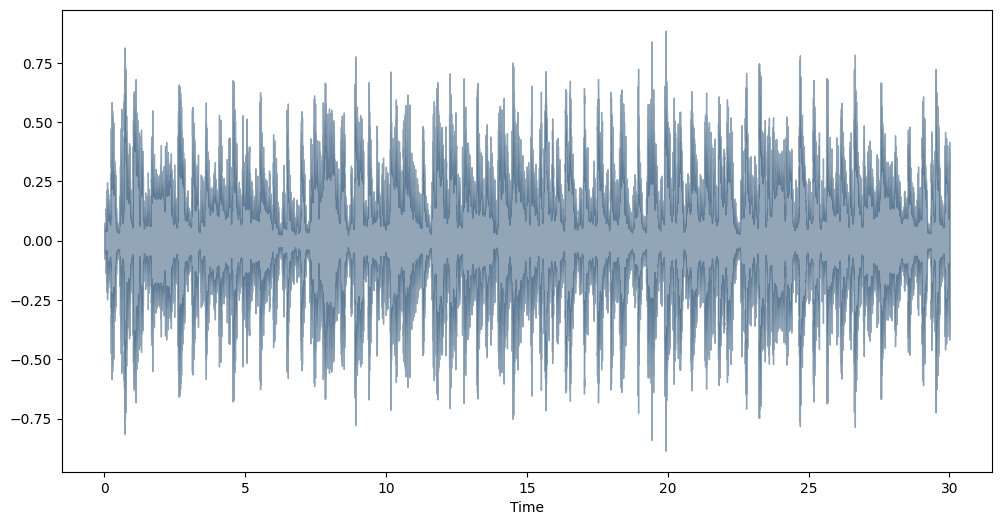

In [8]:
import matplotlib.pyplot as plt
# Wave form of the audio
plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color="#284F72", alpha=0.5)
plt.show()

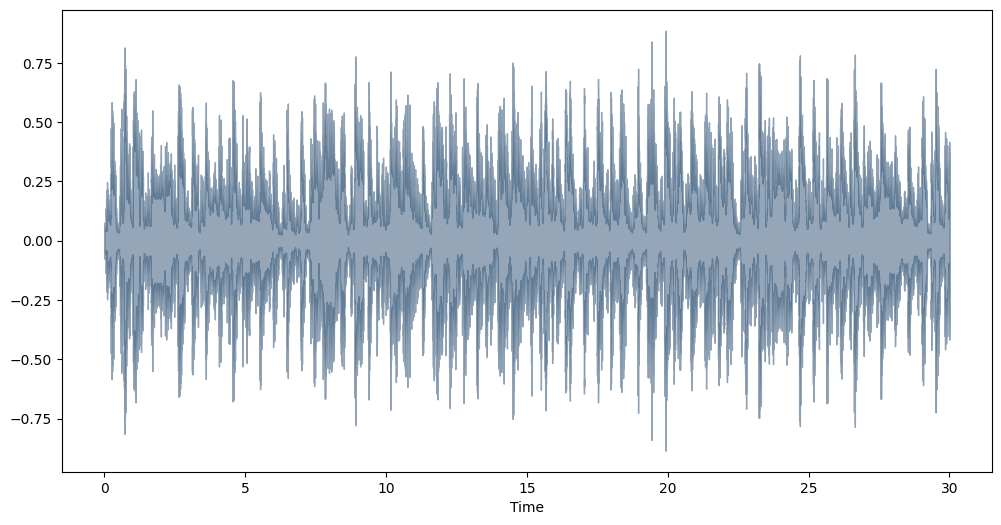

In [9]:
data, sr = librosa.load(data_path)
plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color="#2B4F72", alpha=0.5)
plt.show()

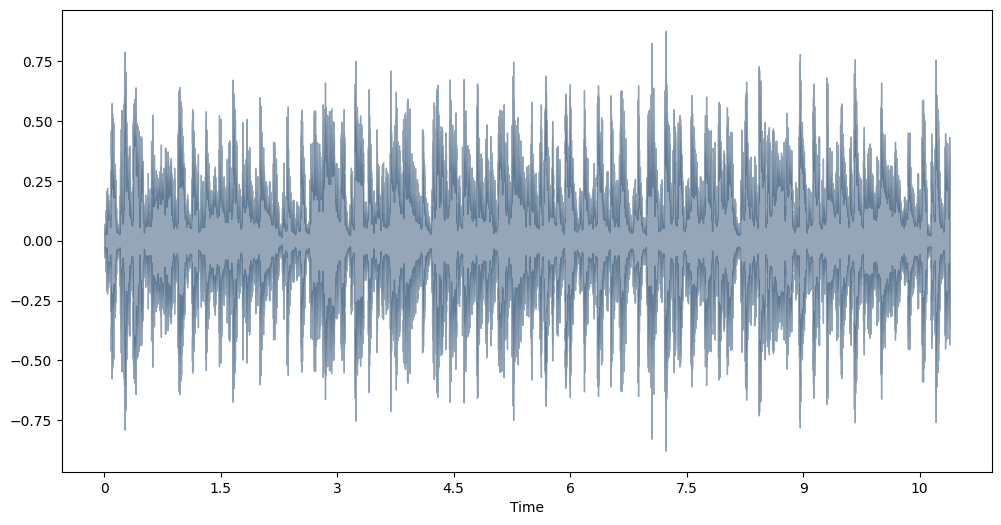

In [10]:
data, sr = librosa.load(data_path, sr=8000)
plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color="#2B4F72", alpha=0.5)
plt.show()

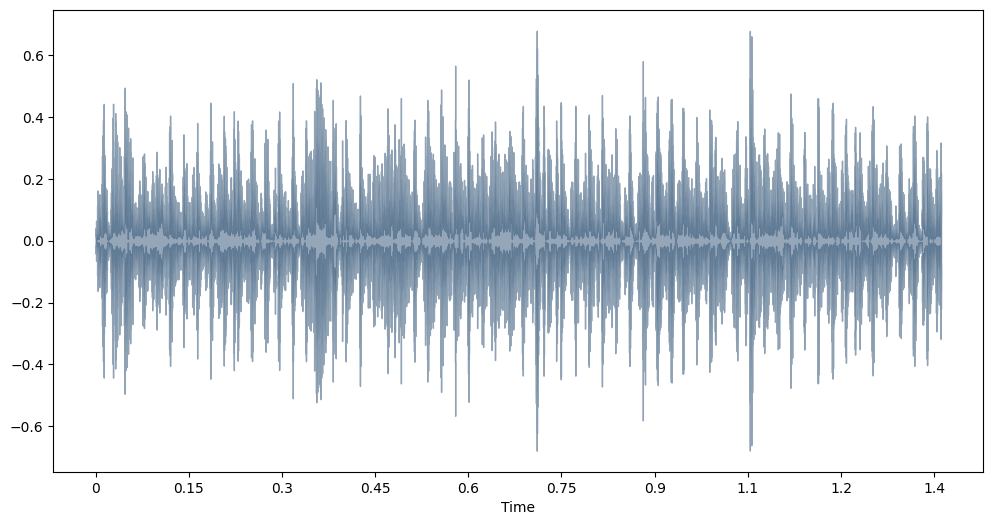

In [11]:
data, sr = librosa.load(data_path, sr=1000)
plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color="#2B4F72", alpha=0.5)
plt.show()

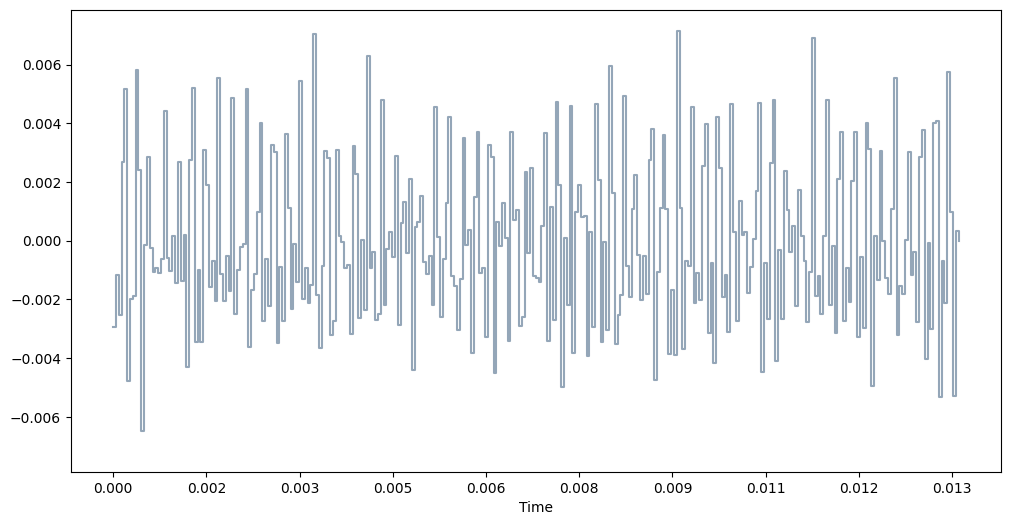

In [12]:
data, sr = librosa.load(data_path, sr=10)
plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color="#2B4F72", alpha=0.5)
plt.show()

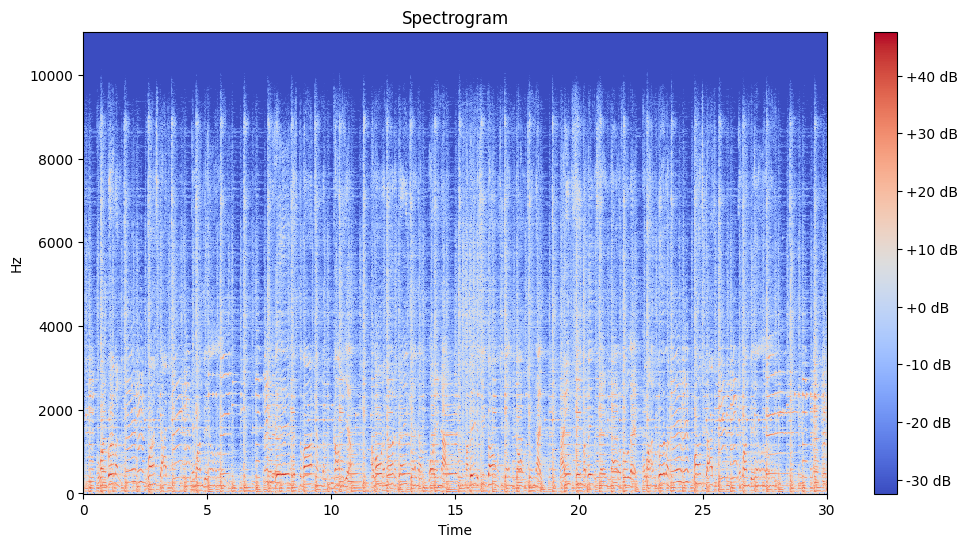

In [13]:
# Let load .wav file with default sampling rate of 22,050 Hz
data, sr = librosa.load(data_path)

# Spectrogram of the audio
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')

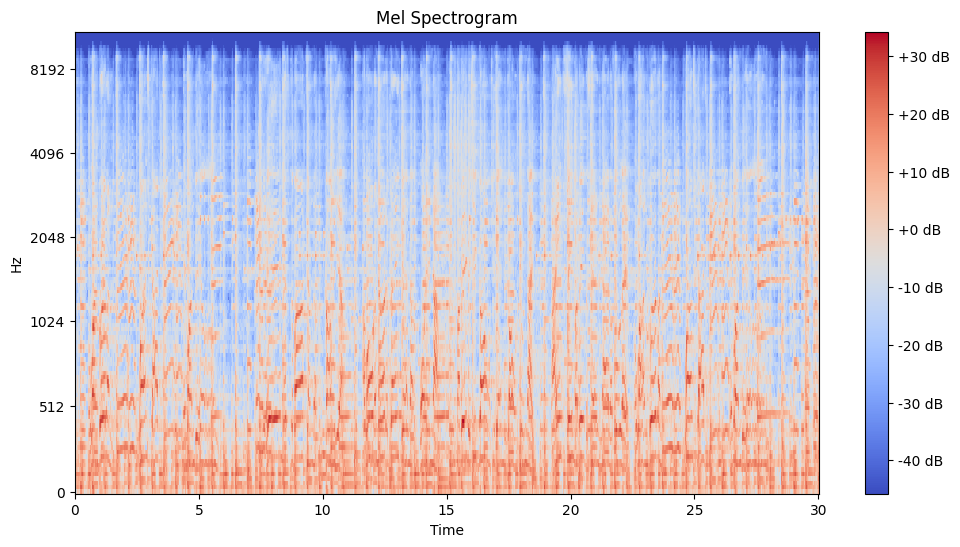

In [14]:
# Let load .wav file with default sampling rate of 22,050 Hz
data, sr = librosa.load(data_path)
# Creating log mel spectrogram
plt.figure(figsize=(12,6))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=sr//2)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=sr//2, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')

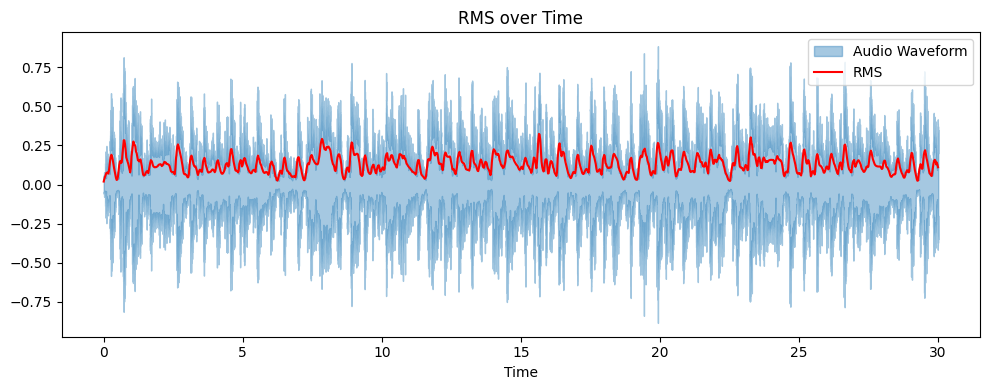

In [15]:
# Let load .wav file with default sampling rate of 22,050 Hz
data, sr = librosa.load(data_path)
# Compute RMS
rms = librosa.feature.rms(y=data)
# Plot RMS
plt.figure(figsize=(10,4))
librosa.display.waveshow(data, sr=sr, alpha=0.4, label='Audio Waveform')
plt.plot(librosa.times_like(rms[0], sr=sr), rms[0], color='r', label='RMS')
plt.legend(loc='upper right')
plt.title('RMS over Time')
plt.tight_layout()
plt.show()

ZCR = 131


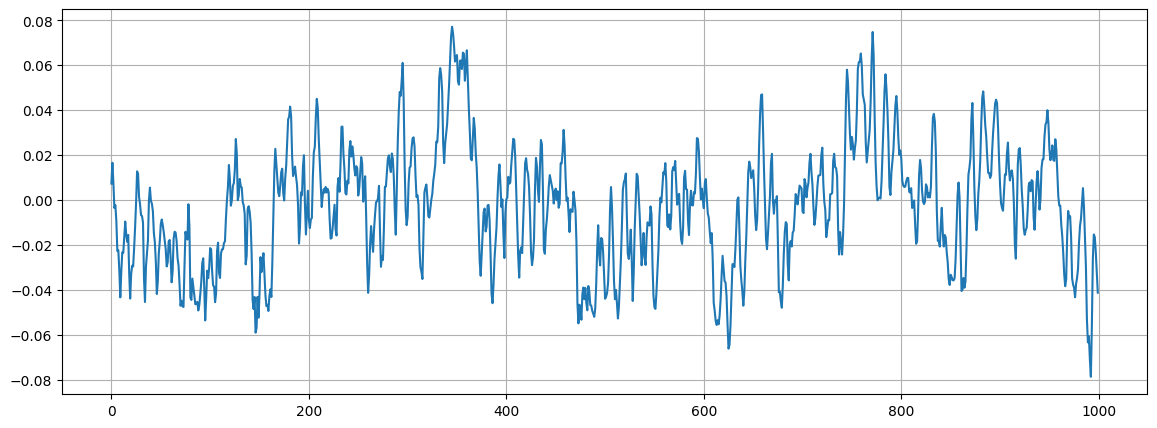

In [16]:
# Let load .wav file with default sampling rate of 22,050 Hz
data, sr = librosa.load(data_path)
# Calculate ZCR of the first 1000 data point of our song
n0 = 0
n1 = 1000
plt.figure(figsize=(14, 5))
plt.plot(data[n0:n1])
plt.grid()
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print(f'ZCR = {sum(zero_crossings)}')

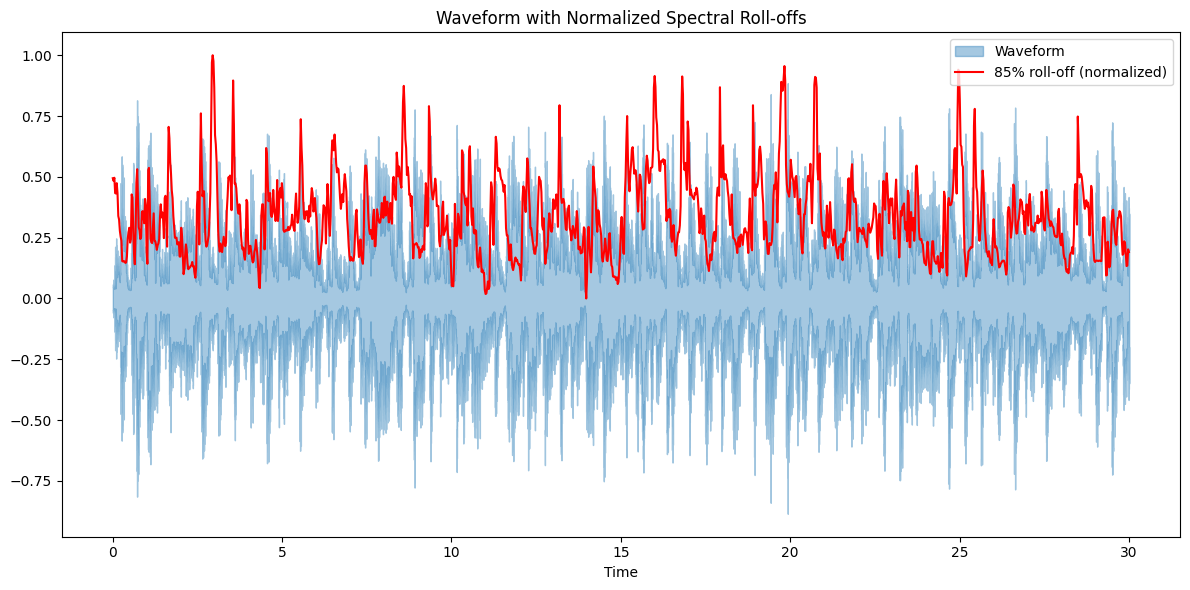

In [17]:
import sklearn.preprocessing
# Function to normalize an array
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
# Load the audio file with default sampling rate of 22,050 Hz
data, sr = librosa.load(data_path)
# Compute and norm the spectral roll-off
rolloff_85 = librosa.feature.spectral_rolloff(y=data, sr=sr, roll_percent=0.85)[0]
rolloff_85_norm = normalize(rolloff_85)
# Plot the waveform and normalized spectral roll-offs
plt.figure(figsize=(12,6))
librosa.display.waveshow(data, sr=sr, alpha=0.4, label='Waveform')
times = librosa.times_like(rolloff_85)
plt.plot(times, rolloff_85_norm, color='r', label='85% roll-off (normalized)')
plt.title('Waveform with Normalized Spectral Roll-offs')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

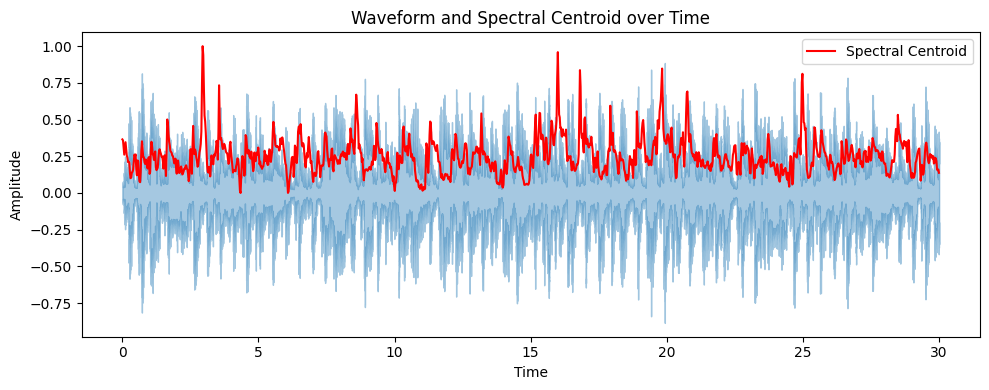

In [18]:
# Load the audio file with default sampling rate of 22,050 Hz
data, sr = librosa.load(data_path)
# Compute the spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=data, sr=sr)
# Plotting
plt.figure(figsize=(10,4))
librosa.display.waveshow(data, sr=sr, alpha=0.4)
frames = range(len(spectral_centroids[0]))
t = librosa.frames_to_time(frames)
plt.plot(t, normalize(spectral_centroids[0]), color='r', label='Spectral Centroid')
plt.title('Waveform and Spectral Centroid over Time')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

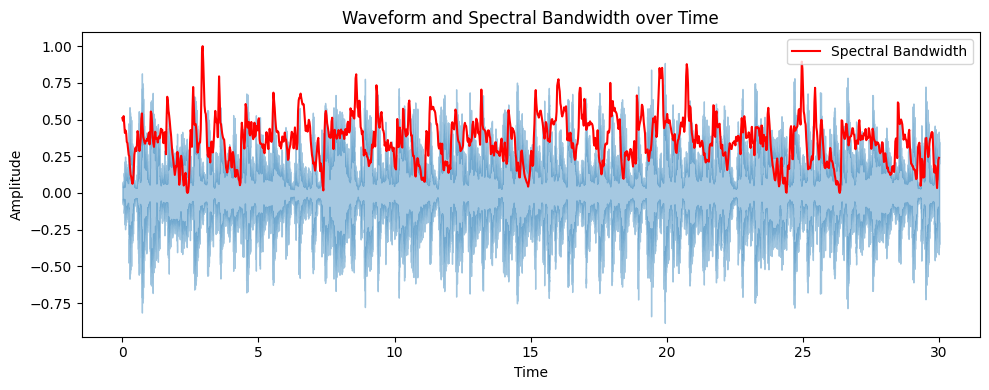

In [19]:
# Let load .wav file with default sampling rate of 22,050 Hz
data, sr = librosa.load(data_path)
# Compute the spectral bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=sr)
# Plotting
plt.figure(figsize=(10,4))
librosa.display.waveshow(data, sr=sr, alpha=0.4)
t = librosa.times_like(spectral_bandwidth)
plt.plot(t, normalize(spectral_bandwidth[0]), color='r', label='Spectral Bandwidth')
plt.title('Waveform and Spectral Bandwidth over Time')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

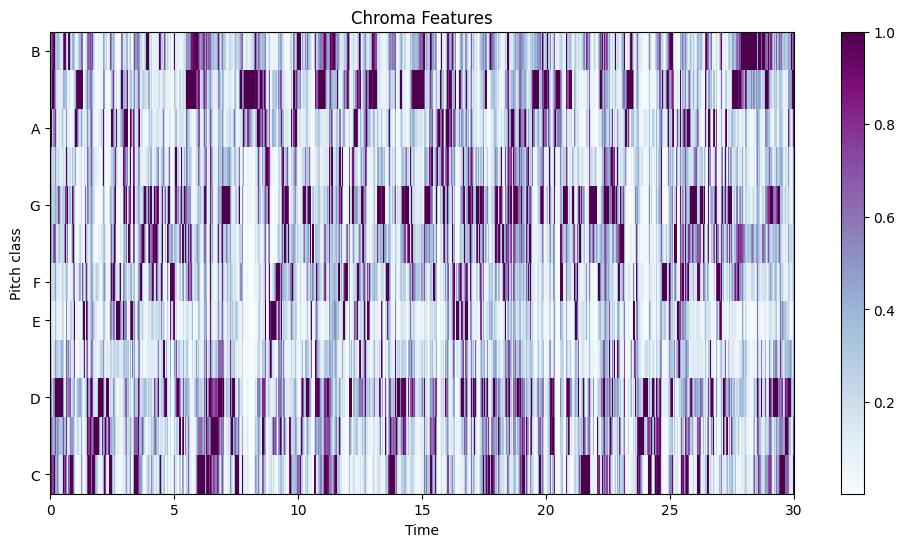

In [20]:
# Let load .wav file with default sampling rate of 22,050 Hz
data, sr = librosa.load(data_path)
chroma = librosa.feature.chroma_stft(y=data, sr=sr)
plt.figure(figsize=(12,6))
librosa.display.specshow(chroma, sr=sr, x_axis="time", y_axis="chroma", cmap="BuPu")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

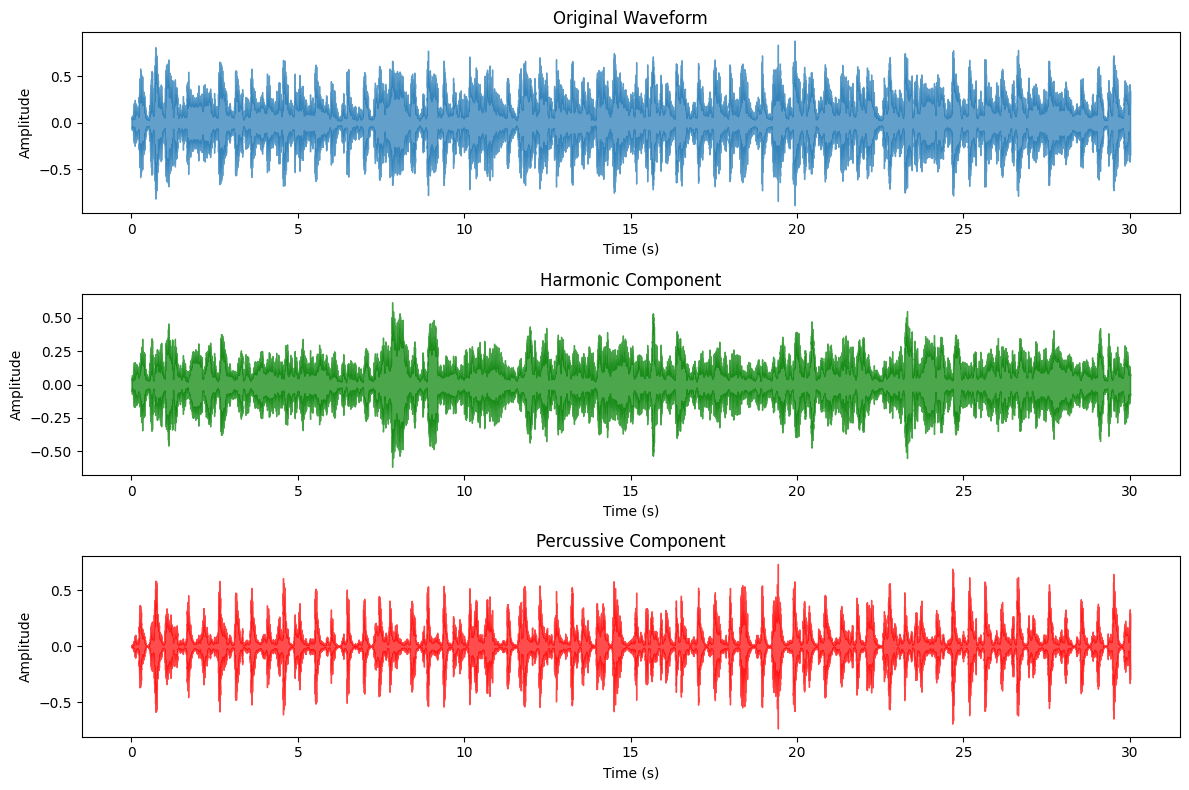

In [21]:
# Load .wav file with default sampling rate of 22,050 Hz
data, sr = librosa.load(data_path)
# Separate the harmonic and percussive components
data_harmonic, data_percussive = librosa.effects.hpss(data)
# Plot the original, harmonic, and percussive waveforms
plt.figure(figsize=(12,8))
# Original waveform
plt.subplot(3,1,1)
librosa.display.waveshow(data, sr=sr, alpha=0.7)
plt.title('Original Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# Harmonic component
plt.subplot(3,1,2)
librosa.display.waveshow(data_harmonic, sr=sr, alpha=0.7, color='g')
plt.title('Harmonic Component')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# Percussive component
plt.subplot(3,1,3)
librosa.display.waveshow(data_percussive, sr=sr, alpha=0.7, color='r')
plt.title('Percussive Component')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

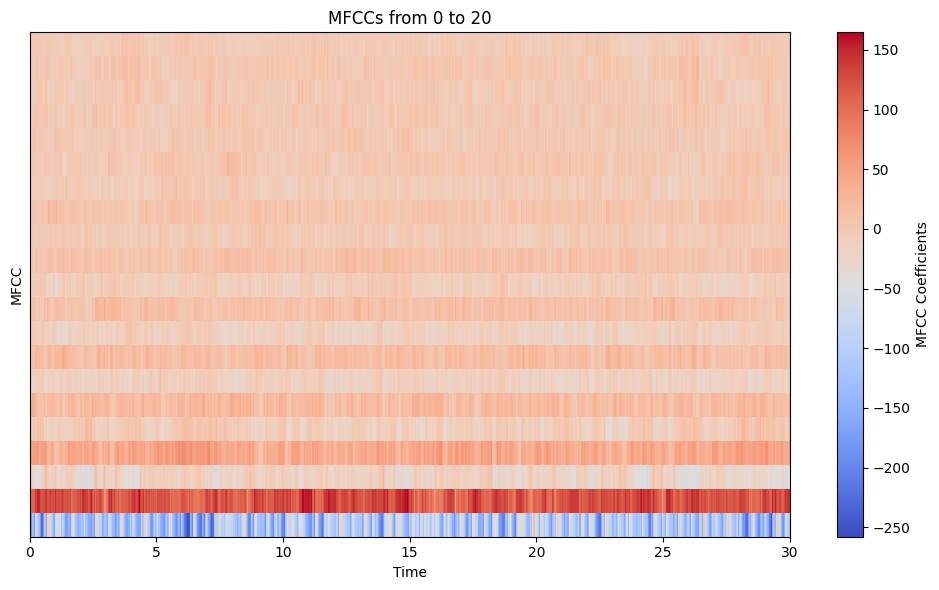

In [22]:
# Let load .wav file with default sampling rate of 22,050 Hz
data, sr = librosa.load(data_path)
# Compute the MFCCs
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=21)  # Compute 21 MFCCs to include 0 to 20
# Visualize the MFCCs
plt.figure(figsize=(10,6))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar(label='MFCC Coefficients')
plt.ylabel('MFCC')
plt.title('MFCCs from 0 to 20')
plt.tight_layout()
plt.show()

In [23]:
from glob import glob
import pandas as pd
num_segment = 10
num_mfcc = 20
sample_rate = 22050
n_fft = 2048
hop_length = 512
my_csv = {"filename": [], "chroma_stft_mean": [], "chroma_stft_var": [], "rms_mean": [], "rms_var": [], "spectral_centroid_mean": [], "spectral_centroid_var": [], "spectral_bandwidth_mean": [], "spectral_bandwidth_var": [], "rolloff_mean": [], "rolloff_var": [], "zero_crossing_rate_mean": [], "zero_crossing_rate_var": [], "harmony_mean": [], "harmony_var": [], "percussive_mean": [], "percussive_var": [], "tempo": []}
for x in range(20):
    feat1 = "mfcc" + str(x+1) + "_mean"
    feat2 = "mfcc" + str(x+1) + "_var"
    my_csv[feat1] = []
    my_csv[feat2] = []
my_csv["label"] = []

In [24]:
dataset_path = "/content/GTZAN/genres_original"
audio_files = glob(dataset_path + "/*/*.wav")
samples_per_segment = int(sample_rate * 30 / num_segment)
genre = ""
for f in sorted(audio_files):
    if genre != f.split('/')[-2]:
        genre = f.split('/')[-2]
        print("Processing " + genre + ".")
    fname = f.split('/')[-1]
    try:
        y, sr = librosa.load(f, sr=sample_rate)
    except:
        continue
    for n in range(num_segment):
        y_seg = y[samples_per_segment * n: samples_per_segment * (n + 1)]
        # Chromagram
        chroma_hop_length = 512
        chromagram = librosa.feature.chroma_stft(y=y_seg, sr=sample_rate, hop_length=chroma_hop_length)
        my_csv["chroma_stft_mean"].append(chromagram.mean())
        my_csv["chroma_stft_var"].append(chromagram.var())
        # Root Mean Square Energy
        rmse = librosa.feature.rms(y=y_seg)
        my_csv["rms_mean"].append(rmse.mean())
        my_csv["rms_var"].append(rmse.var())
        # Spectral Centroid
        spec_cent = librosa.feature.spectral_centroid(y=y_seg)
        my_csv["spectral_centroid_mean"].append(spec_cent.mean())
        my_csv["spectral_centroid_var"].append(spec_cent.var())
        # Spectral Bandwidth
        spec_band = librosa.feature.spectral_bandwidth(y=y_seg, sr=sample_rate)
        my_csv["spectral_bandwidth_mean"].append(spec_band.mean())
        my_csv["spectral_bandwidth_var"].append(spec_band.var())
        # Rolloff
        spec_roll = librosa.feature.spectral_rolloff(y=y_seg, sr=sample_rate)
        my_csv["rolloff_mean"].append(spec_roll.mean())
        my_csv["rolloff_var"].append(spec_roll.var())
        # Zero Crossing Rate
        zero_crossing = librosa.feature.zero_crossing_rate(y=y_seg)
        my_csv["zero_crossing_rate_mean"].append(zero_crossing.mean())
        my_csv["zero_crossing_rate_var"].append(zero_crossing.var())
        # Harmonics and Percussive
        harmony, percussive = librosa.effects.hpss(y=y_seg)
        my_csv["harmony_mean"].append(harmony.mean())
        my_csv["harmony_var"].append(harmony.var())
        my_csv["percussive_mean"].append(percussive.mean())
        my_csv["percussive_var"].append(percussive.var())
        # Tempo
        tempo, _ = librosa.beat.beat_track(y=y_seg, sr=sample_rate)
        my_csv["tempo"].append(tempo)
        # MFCC
        mfcc = librosa.feature.mfcc(y=y_seg, sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
        mfcc = mfcc.T
        fseg_name = ','.join(fname.split(',')[:2]) + f'_{n}.wav'
        my_csv["filename"].append(fseg_name)
        my_csv["label"].append(genre)
        for x in range(20):
            feat1 = "mfcc" + str(x+1) + "_mean"
            feat2 = "mfcc" + str(x+1) + "_var"
            my_csv[feat1].append(mfcc[:, x].mean())
            my_csv[feat2].append(mfcc[:, x].var())
        print(fname)
df = pd.DataFrame(my_csv)
df.to_csv('/content/GTZAN/features_3_sec.csv', index=False)

Streaming output truncated to the last 5000 lines.
blues.00054.wav
blues.00054.wav
blues.00054.wav
blues.00054.wav
blues.00054.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00060.wav
blues.00060.wav
blues.00060.wav
blues.00060.wav
blues

<ipython-input-24-1bed098d1241>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(f, sr=sample_rate)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061

In [27]:
df = pd.read_csv("/content/GTZAN/features_3_sec.csv")
df.head()

filename  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav_0.wav          0.335555         0.090997  0.130189   
1  blues.00000.wav_1.wav          0.343523         0.086782  0.112119   
2  blues.00000.wav_2.wav          0.347746         0.092495  0.130895   
3  blues.00000.wav_3.wav          0.363863         0.087207  0.131349   
4  blues.00000.wav_4.wav          0.335481         0.088482  0.142370   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003559             1773.358004          169450.829707   
1  0.001491             1817.244034           90766.297514   
2  0.004552             1790.722358          110071.206762   
3  0.002338             1660.545231          109496.936309   
4  0.001734             1634.465076           77425.419156   

   spectral_bandwidth_mean  spectral_bandwidth_var  rolloff_mean  ...  \
0              1972.334258           117272.640573   3714.063439  ...   
1              2010.751494            65940.666037   3870.510442  ...   
2              2088.184750            73391.498088   4000.206581  ...   
3              1967.920582            79805.901501   3579.149639  ...   
4              1954.633566            57359.695597   3480.096905  ...   

   mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0   39.547073    -3.230046   36.606853     0.696385   37.766136    -5.035945   
1   64.819786    -6.025473   40.548813     0.127131   51.048943    -2.808956   
2   68.306790    -1.714476   28.136944     2.329553   47.211426    -1.925621   
3   48.543200    -3.786987   28.419544     1.153315   35.682700    -3.501980   
4   30.829542     0.635798   44.645554     1.591107   51.415867    -3.364908   

   mfcc19_var mfcc20_mean  mfcc20_var  label  
0   33.668550   -0.239585   43.818882  blues  
1   97.221500    5.771881   60.360348  blues  
2   52.922432    2.466996   33.164000  blues  
3   50.610344    3.580636   32.325874  blues  
4   26.421085    0.501504   29.109533  blues  

[5 rows x 59 columns]

In [30]:
df['tempo'].str[1:-1]

0       129.19921875
1         123.046875
2         123.046875
3         123.046875
4         123.046875
            ...     
9985      123.046875
9986     83.35433468
9987      123.046875
9988      123.046875
9989    234.90767045
Name: tempo, Length: 9990, dtype: object

In [28]:
df.dtypes

filename                    object
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
percussive_mean            float64
percussive_var             float64
tempo                       object
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean                 float64
mfcc6_var                  float64
mfcc7_mean                 float64
mfcc7_var                  float64
mfcc8_mean                 float64
mfcc8_var                  float64
mfcc9_mean                 float64
mfcc9_var                  float64
mfcc10_mean                float64
mfcc10_var                 float64
mfcc11_mean                float64
mfcc11_var                 float64
mfcc12_mean                float64
mfcc12_var                 float64
mfcc13_mean                float64
mfcc13_var                 float64
mfcc14_mean                float64
mfcc14_var                 float64
mfcc15_mean                float64
mfcc15_var                 float64
mfcc16_mean                float64
mfcc16_var                 float64
mfcc17_mean                float64
mfcc17_var                 float64
mfcc18_mean                float64
mfcc18_var                 float64
mfcc19_mean                float64
mfcc19_var                 float64
mfcc20_mean                float64
mfcc20_var                 float64
label                       object
dtype: object

In [31]:
# Reading the csv file
df = pd.read_csv("/content/GTZAN/features_3_sec.csv")
df.head()
# Drop the column filename as it is no longer required for training
df = df.drop(labels="filename", axis=1)
df['tempo'] = df['tempo'].str[1:-1]
# Splitting data and labels
X, y = df.iloc[:, :-1], df.iloc[:, -1]
# Label Encoding
# Blues - 0
# Classical - 1
# Country - 2
# Disco - 3
# Hip-hop - 4
# Jazz - 5
# Metal - 6
# Pop - 7
# Reggae - 8
# Rock - 9
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
# Data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Training set score: 0.953
Test set score: 0.891
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       312
           1       0.91      0.96      0.93       314
           2       0.81      0.87      0.84       291
           3       0.81      0.92      0.86       300
           4       0.91      0.88      0.90       294
           5       0.90      0.86      0.88       320
           6       0.97      0.93      0.95       295
           7       0.95      0.84      0.89       302
           8       0.86      0.90      0.88       276
           9       0.91      0.82      0.86       293

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



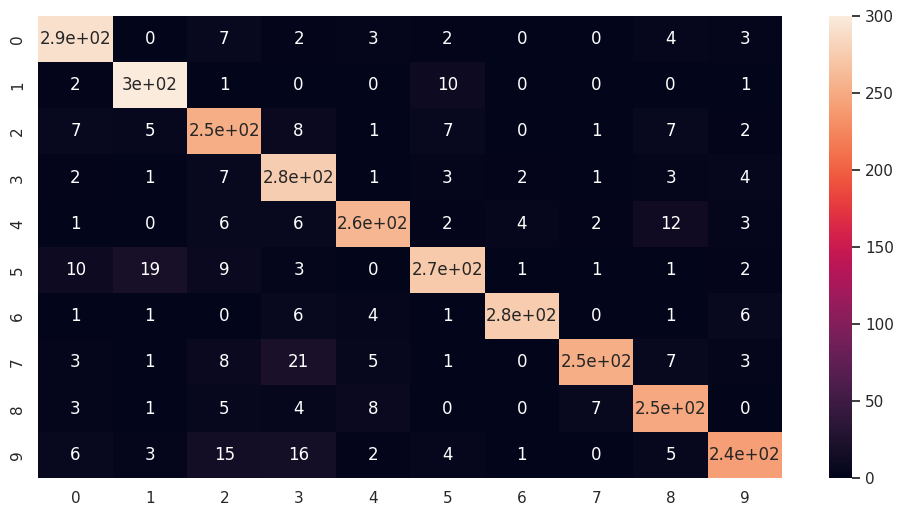

In [40]:
from sklearn.model_selection import train_test_split
# Splitting 70% data into training set and the remaining 30% to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

knn_cls = KNeighborsClassifier(n_neighbors=3)
knn_cls.fit(X_train, y_train)
y_pred = knn_cls.predict(X_test)
print("Training set score: {:.3f}".format(knn_cls.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn_cls.score(X_test, y_test)))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize': (12, 6)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test, y_pred))

Training set score: 0.919
Test set score: 0.845
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       312
           1       0.88      0.96      0.92       314
           2       0.81      0.80      0.80       291
           3       0.78      0.80      0.79       300
           4       0.92      0.80      0.86       294
           5       0.87      0.88      0.88       320
           6       0.89      0.91      0.90       295
           7       0.89      0.88      0.89       302
           8       0.80      0.85      0.83       276
           9       0.75      0.71      0.73       293

    accuracy                           0.84      2997
   macro avg       0.84      0.84      0.84      2997
weighted avg       0.85      0.84      0.84      2997



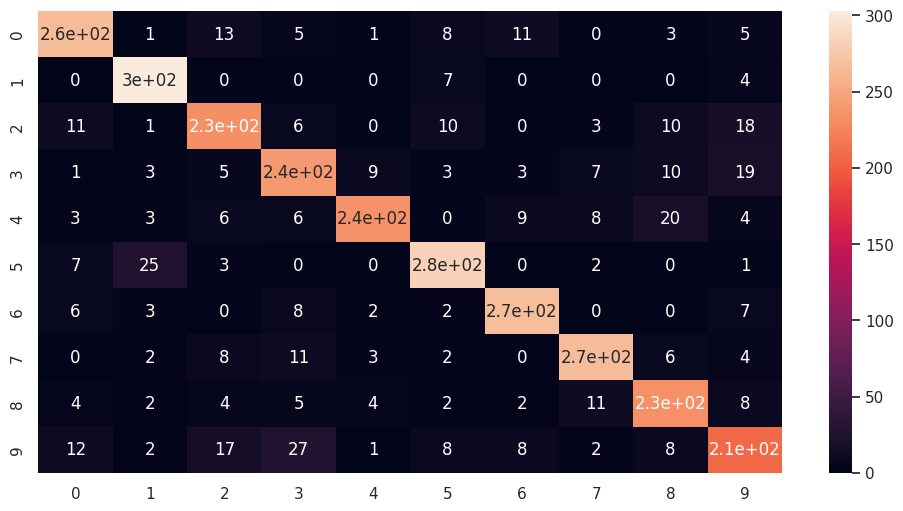

In [39]:
# SVM Classifier
from sklearn.svm import SVC

svm_cls = SVC(kernel='rbf', degree=8)
svm_cls.fit(X_train, y_train)

print("Training set score: {:.3f}".format(svm_cls.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svm_cls.score(X_test, y_test)))

y_pred = svm_cls.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize': (12,6)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test, y_pred))

In [36]:
import os
import numpy as np
import torch
from torch import nn, optim
from torch.functional import F
from torch.utils.data import DataLoader, TensorDataset
# Initialize a simple Multilayer Perceptron
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 10)
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = F.relu(self.fc5(x))
        x = self.dropout(x)
        x = F.softmax(self.fc6(x), dim=1)
        return x

In [37]:
input_size = X_train.shape[1]
model = MLP(input_size)
# Use Cross Entropy as loss function with Adam optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.000146)
# Training loop
num_epochs = 300
batch_size = 256
train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.tensor(y_train))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(torch.FloatTensor(X_test), torch.tensor(y_test))
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
step = 0
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if step % 100 == 0:
            print(f"Step {step}, Train Loss: {loss.item():.4f}")
        step += 1
    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs.float())
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            predicted = outputs.argmax(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    val_loss /= len(val_loader)
    val_accuracy = 100 * correct / total
    print(f"Epoch {epoch + 1} / {num_epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")
# Sample testing
model.eval()
with torch.no_grad():
    predictions = model(torch.FloatTensor(X_test))
    predicted_indices = predictions.argmax(1)
    print("Expected Index: {}, Predicted Index: {}".format(y_test, predicted_indices.numpy()))

Step 0, Train Loss: 2.3024
Epoch 1 / 300, Validation Loss: 2.3004, Validation Accuracy: 16.85%
Epoch 2 / 300, Validation Loss: 2.2879, Validation Accuracy: 21.92%
Epoch 3 / 300, Validation Loss: 2.2170, Validation Accuracy: 20.85%
Step 100, Train Loss: 2.1795
Epoch 4 / 300, Validation Loss: 2.1689, Validation Accuracy: 27.13%
Epoch 5 / 300, Validation Loss: 2.1291, Validation Accuracy: 33.83%
Epoch 6 / 300, Validation Loss: 2.0893, Validation Accuracy: 35.27%
Epoch 7 / 300, Validation Loss: 2.0735, Validation Accuracy: 36.47%
Step 200, Train Loss: 2.1075
Epoch 8 / 300, Validation Loss: 2.0574, Validation Accuracy: 38.77%
Epoch 9 / 300, Validation Loss: 2.0346, Validation Accuracy: 41.61%
Epoch 10 / 300, Validation Loss: 2.0217, Validation Accuracy: 43.08%
Step 300, Train Loss: 2.0630
Epoch 11 / 300, Validation Loss: 2.0110, Validation Accuracy: 43.91%
Epoch 12 / 300, Validation Loss: 1.9980, Validation Accuracy: 45.08%
Epoch 13 / 300, Validation Loss: 1.9897, Validation Accuracy: 45.75

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       312
           1       0.89      0.96      0.93       314
           2       0.79      0.84      0.82       291
           3       0.80      0.81      0.81       300
           4       0.86      0.82      0.84       294
           5       0.84      0.89      0.86       320
           6       0.90      0.91      0.90       295
           7       0.86      0.87      0.86       302
           8       0.76      0.80      0.78       276
           9       0.78      0.65      0.71       293

    accuracy                           0.84      2997
   macro avg       0.83      0.84      0.83      2997
weighted avg       0.84      0.84      0.84      2997



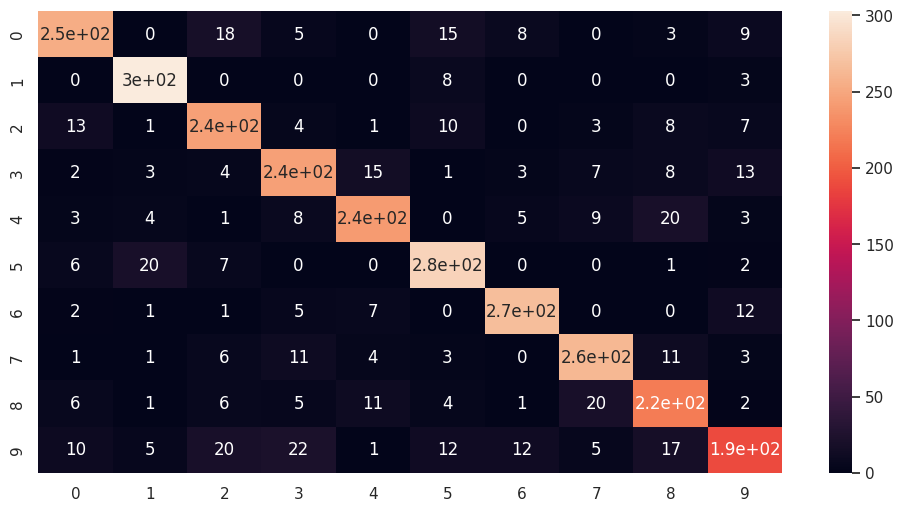

In [38]:
# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
import seaborn as sns
y_pred = predicted_indices.numpy()
cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize': (12,6)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test, y_pred))